In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import cmaps
import numpy as np
import xarray as xr
from facets import facets
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
# GEOSChem restart file
dg = xr.open_dataset('GEOSChem_restart.201308010000.nc.mp')
# print(ds)

In [4]:
#HEMCO Diagnostic file
ddh = xr.open_dataset('HEMCO_diagnostics.201308010000.nc')
print(ddh)

<xarray.Dataset>
Dimensions:  (lat: 46, lev: 47, lon: 72, time: 1)
Coordinates:
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
  * lat      (lat) float64 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) datetime64[ns] 2013-08-01
Data variables:
    AREA     (lat, lon) float64 ...
Attributes:
    title:    HEMCO  diagnostics
    history:  NC_CREATE.F90
    format:   netCDF-4


In [5]:
#HEMCO Restart file
drh = xr.open_dataset('HEMCO_restart.201308010000.nc.mp')
print(drh)

<xarray.Dataset>
Dimensions:        (lat: 46, lev: 47, lon: 72, time: 1)
Coordinates:
  * lon            (lon) float64 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 ...
  * lat            (lat) float64 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 ...
  * lev            (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * time           (time) datetime64[ns] 2013-08-01
Data variables:
    AREA           (lat, lon) float64 ...
    PARDF_DAVG     (time, lat, lon) float32 ...
    PARDR_DAVG     (time, lat, lon) float32 ...
    T_DAVG         (time, lat, lon) float32 ...
    T_PREVDAY      (time, lat, lon) float32 ...
    LAI_PREVDAY    (time, lat, lon) float32 ...
    DEP_RESERVOIR  (time, lat, lon) float32 ...
    GWET_PREV      (time, lat, lon) float32 ...
    DRYPERIOD      (time, lat, lon) float32 ...
    PFACTOR        (time, lat, lon) float32 ...
Attributes:
    title:    HEMCO  restart
    history:  NC_CREATE.F90
    format:   netCDF-4


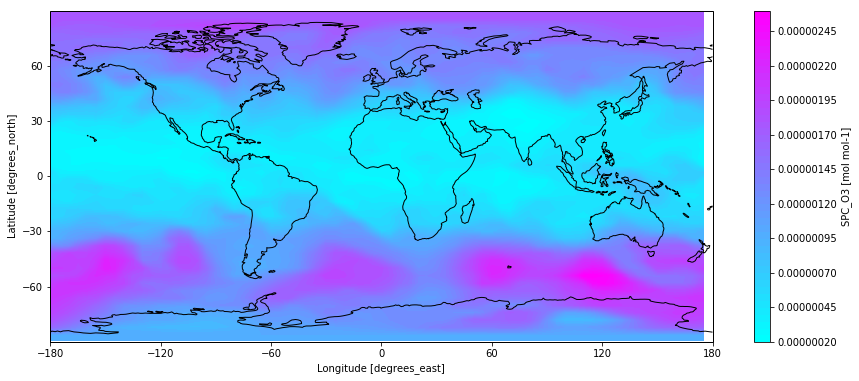

In [57]:
d = dg['SPC_O3']
d = d[0,35,:,:]
# d.to_netcdf('d.nc')
lat = d.coords['lat']; lon = d.coords['lon']; lon,lat = np.meshgrid(lon,lat)
projection = ccrs.PlateCarree()
fig, axes = facets(1,1, width = 12.0, aspect = 0.4, axes_kwargs = dict(projection = projection))
# fig, axes, cax = facets(1,1, width = 12.0, aspect = 0.4, 
#                   axes_kwargs = dict(projection = projection), cbar_mode = 'single')
ax = axes[0]
d.plot.contourf(ax = ax, transform = projection, cmap = 'cool', levels = 50)
#ax.contourf(lon, lat, d, transform = projection)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs = projection)
ax.set_yticks([-60, -30, 0, 30, 60], crs = projection)
ax.coastlines()
ax.set_global()
ax.set_title('')
plt.show()